In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import numpy as np

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [2]:
def format_number(num):
    if abs(num) >= 1e6:
        return f"{num/1e6:.3f}M"
    elif abs(num) >= 1e3:
        return f"{num/1e3:.3f}K"
    else:
        return f"{num:.3f}"



In [2]:
path_orig = '../data/raw/'

df = pd.read_csv(
    f"{path_orig}Corp_HouseOfCommons_V2.csv", encoding="ISO-8859-1"
)

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['text'] = df['text'].astype(str)

In [4]:
df.columns

Index(['date', 'agenda', 'speechnumber', 'speaker', 'party', 'party.facts.id',
       'chair', 'terms', 'text', 'parliament', 'iso3country'],
      dtype='object')

In [14]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
print("\nSummary statistics of numerical columns:")
numeric_df.describe().applymap(format_number)


Summary statistics of numerical columns:


,speechnumber,party.facts.id,terms
count,1.956M,1.846M,1.956M
mean,236.809,1.505K,186.247
std,161.549,180.272,323.699
min,1.000,335.000,1.000
25%,105.000,1.516K,42.000
50%,217.000,1.516K,78.000
75%,343.000,1.567K,150.000
max,1.828K,7.365K,24.699K


In [15]:
print("\nSummary statistics of categorical columns:")
summary_categorical = df.select_dtypes(include=['object']).describe()
missing_values_df = df.select_dtypes(include=['object']).isnull().sum().to_frame().T
missing_values_df.index = ['missing_values']
summary_categorical_with_missing = pd.concat([summary_categorical, missing_values_df])
summary_categorical_with_missing


Summary statistics of categorical columns:


,agenda,speaker,party,text,parliament,iso3country
count,1778235,1955170,1860334,1956223,1956223,1956223
unique,60969,2174,21,1861047,1,1
top,Business of the House,CHAIR,Con,Will the hon. Gentleman give way?,UK-HouseOfCommons,GBR
freq,36090,95317,878080,13127,1956223,1956223
missing_values,177988,1053,95889,0,0,0


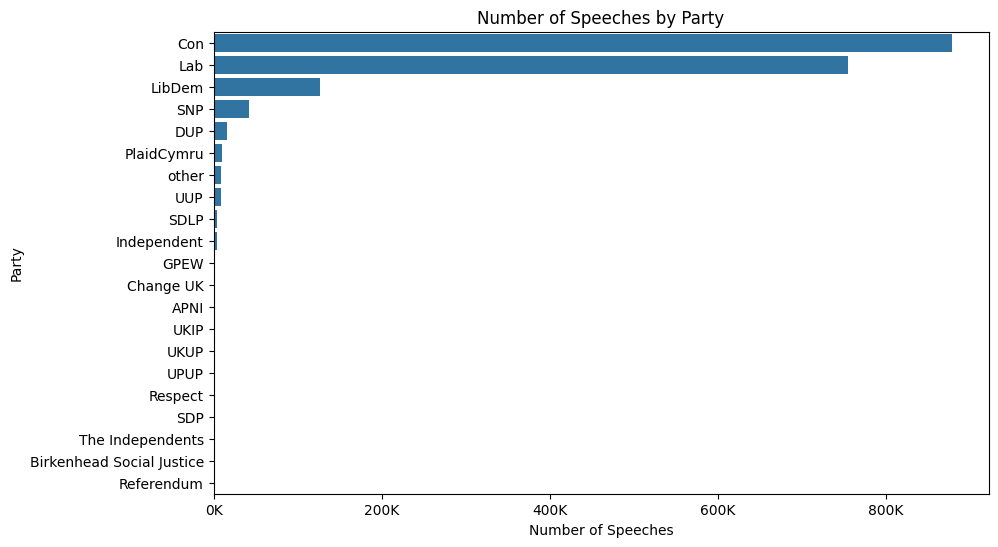

In [18]:
party_order = df['party'].value_counts().index
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, y='party', order=party_order)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}K'.format(x / 1000)))
plt.title('Number of Speeches by Party')
plt.xlabel('Number of Speeches')
plt.ylabel('Party')
plt.show()

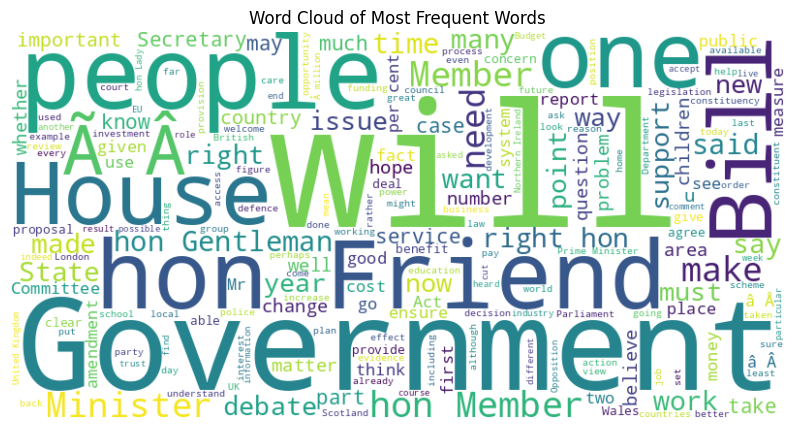

In [19]:
sample_size = 1000
sample_texts = df['text'].sample(n=sample_size, random_state=42).astype(str)
text = ' '.join(sample_texts)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

In [20]:
count_vectorizer = CountVectorizer()
counts = count_vectorizer.fit_transform( df['text'])
vocabulary = count_vectorizer.get_feature_names_out()
print("\nVocabulary:")
print(vocabulary[:100])


Vocabulary:
['00' '000' '0000' '00000' '0000001' '0000008' '000001' '000001p' '000002'
 '00000461765064' '00001' '00002' '000023' '000046' '00005' '000051'
 '00006' '0000625' '000063' '0001' '00012ã' '00017' '0001p' '0002' '00020'
 '0002ã' '0003' '00030' '00035' '0004' '00047' '00048' '0005' '00050'
 '00051700040384' '0006' '0007' '00096' '000a' '000an' '000ft' '000ftã'
 '000hp' '000i' '000kg' '000km' '000kw' '000m' '000mw' '000of' '000p'
 '000pa' '000s' '000th' '000things' '000ã' '001' '0012' '0014' '0015'
 '0017' '001989' '001st' '002' '0020and' '0024' '003' '0035' '00350'
 '003594' '00363172' '00369' '0037' '00385' '004' '0043' '0044' '0045'
 '005' '006' '0069' '0069mposed' '007' '0072' '007ã' '008' '0082' '00830'
 '008m' '009' '00945' '0095' '00969' '00bd' '00pm' '00pmã' '00s' '00ã'
 '01' '010']


In [16]:
word_frequencies = np.asarray(counts.sum(axis=0)).reshape(-1)
word_indices_sorted_by_frequency = np.argsort(word_frequencies)[::-1]
vocabulary_sorted_by_frequency = vocabulary[word_indices_sorted_by_frequency]
word_frequencies_sorted = word_frequencies[word_indices_sorted_by_frequency]

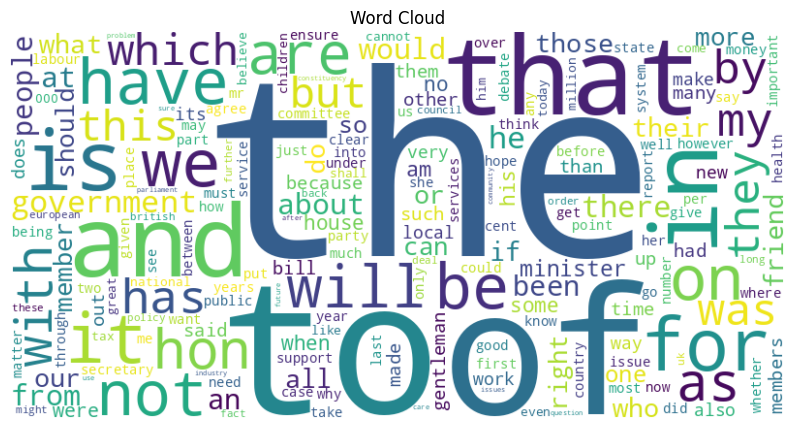

In [20]:
wordcloud = WordCloud(
    width=800, height=400, background_color='white'
).generate_from_frequencies(
    dict(zip(vocabulary, word_frequencies))
)
plt.figure(figsize=(10, 6))
plt.imshow(
    wordcloud, interpolation='bilinear'
)
plt.axis('off')
plt.title('Word Cloud')
plt.show()

In [ ]:
top_n = 40
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), word_frequencies_sorted[:top_n])
plt.xticks(range(top_n), vocabulary_sorted_by_frequency[:top_n], rotation=45, ha='right')
plt.title(f'Top {top_n} Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# 4. Heatmap of Word Frequencies
plt.figure(figsize=(12, 8))
sns.heatmap(counts[:, word_indices_sorted_by_frequency[:100]].toarray(), cmap='viridis')
plt.title('Heatmap of Word Frequencies (Top 100 Words)')
plt.xlabel('Word')
plt.ylabel('Document')
plt.show()

KeyboardInterrupt: 

Descriptive Statistics of Speech Lengths:
count    1.956223e+06
mean     1.862469e+02
std      3.236986e+02
min      1.000000e+00
25%      4.200000e+01
50%      7.800000e+01
75%      1.500000e+02
max      2.469900e+04
Name: terms, dtype: float64


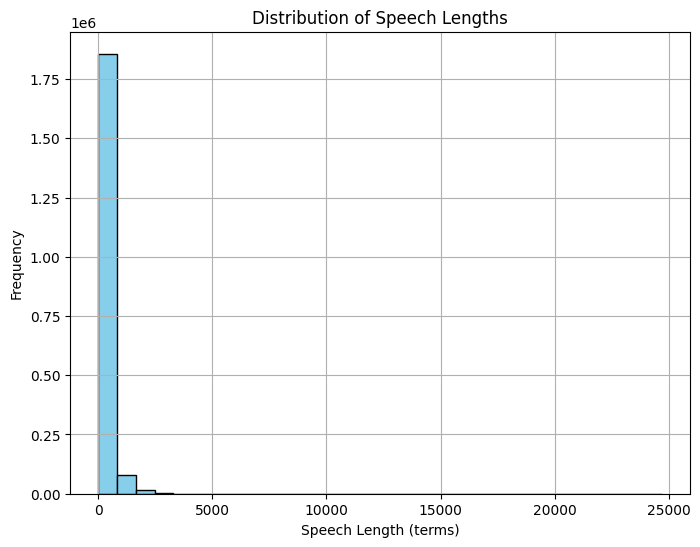

In [11]:
# 1. Descriptive Statistics
speech_lengths = df['terms']
print("Descriptive Statistics of Speech Lengths:")
print(speech_lengths.describe())

# 2. Visualize Distribution of Speech Lengths
plt.figure(figsize=(8, 6))
plt.hist(speech_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Speech Lengths')
plt.xlabel('Speech Length (terms)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

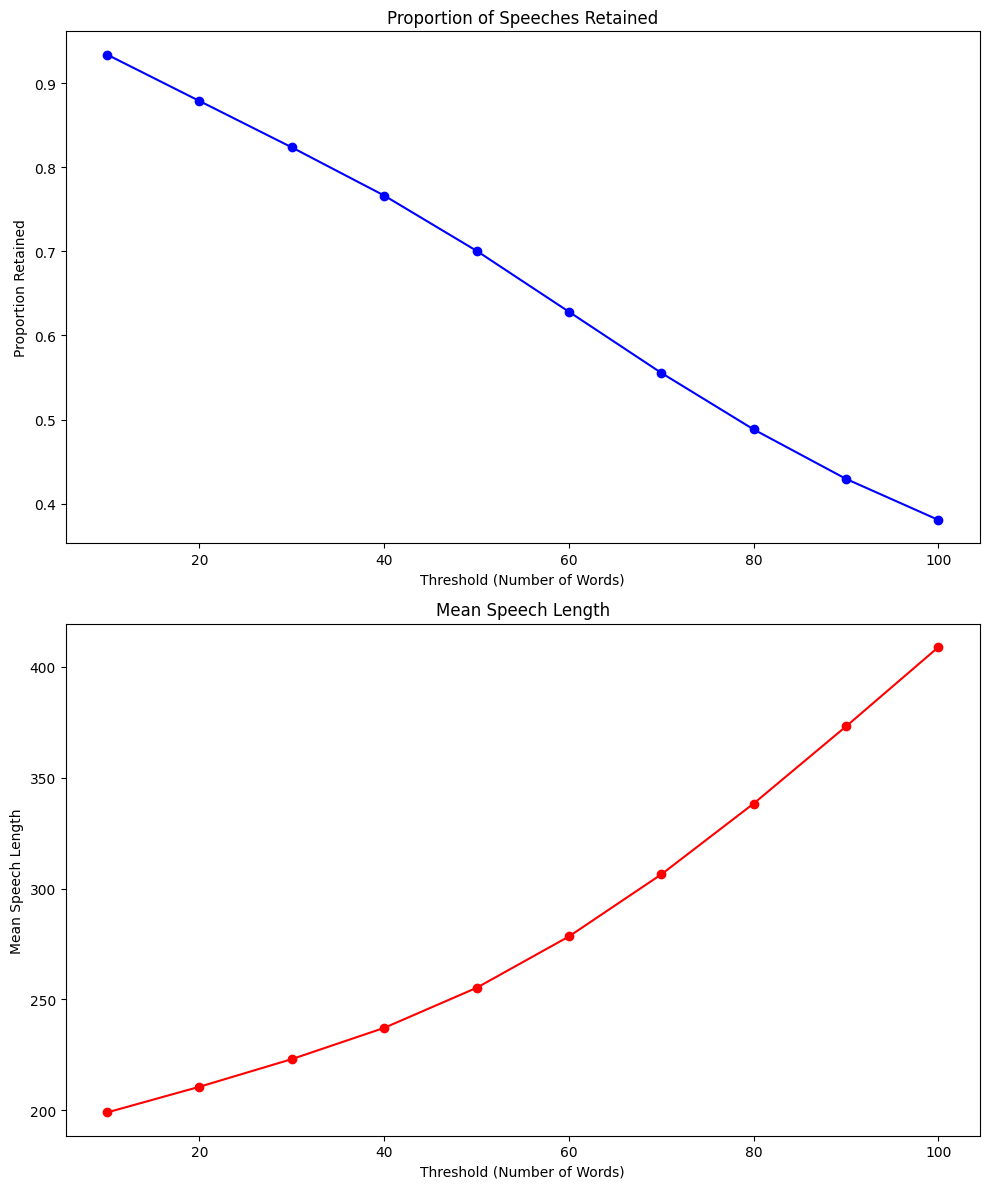

In [10]:
# Define a range of threshold values
threshold_values = range(10, 101, 10)

# Initialize lists to store evaluation metrics
proportion_retained = []
mean_speech_length = []

# Iterate over threshold values
for threshold in threshold_values:
    # Filter speeches based on the current threshold
    filtered_df = df[df['terms'] >= threshold]
    
    # Calculate evaluation metrics
    proportion_retained.append(len(filtered_df) / len(df))
    mean_speech_length.append(filtered_df['terms'].mean())

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot Proportion Retained
axs[0].plot(threshold_values, proportion_retained, marker='o', color='b')
axs[0].set_title('Proportion of Speeches Retained')
axs[0].set_xlabel('Threshold (Number of Words)')
axs[0].set_ylabel('Proportion Retained')

# Plot Mean Speech Length
axs[1].plot(threshold_values, mean_speech_length, marker='o', color='r')
axs[1].set_title('Mean Speech Length')
axs[1].set_xlabel('Threshold (Number of Words)')
axs[1].set_ylabel('Mean Speech Length')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [12]:

# Descriptive Statistics of the Number of Speeches per Speaker
speeches_per_speaker = df.groupby('speaker')['text'].count()
print("Descriptive Statistics of the Number of Speeches per Speaker:")
print(speeches_per_speaker.describe())

Descriptive Statistics of the Number of Speeches per Speaker:
count     2174.000000
mean       899.342226
std       2355.118514
min          1.000000
25%        140.500000
50%        457.000000
75%       1122.000000
max      95317.000000
Name: text, dtype: float64


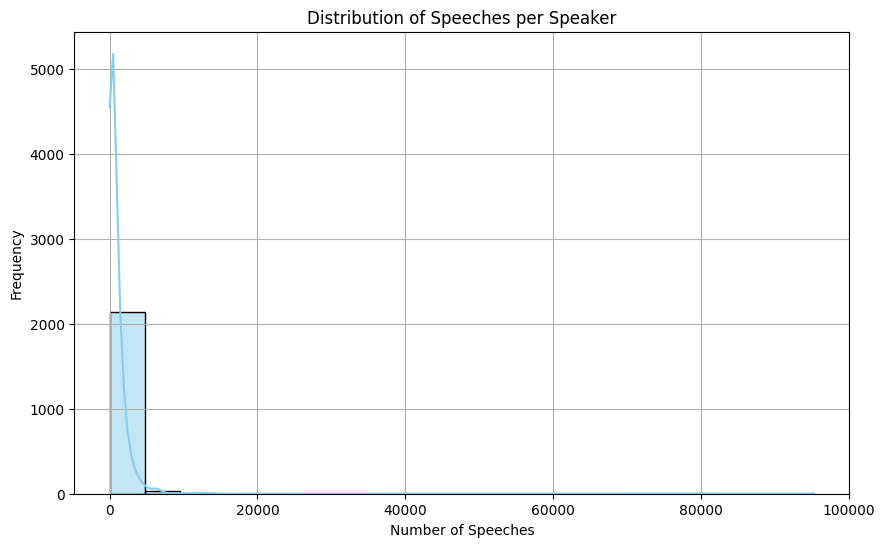

In [13]:


# Visualization: Distribution of Speeches per Speaker
plt.figure(figsize=(10, 6))
sns.histplot(speeches_per_speaker, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Speeches per Speaker')
plt.xlabel('Number of Speeches')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [14]:

# Comparative Analysis: Characteristics of Speakers
speaker_characteristics = df.groupby('speaker').agg({'party': 'nunique', 'text': 'count'}).reset_index()
speaker_characteristics.columns = ['speaker', 'num_parties', 'num_speeches']
print("\nComparative Analysis: Characteristics of Speakers:")
print(speaker_characteristics.head())

# Temporal Analysis: Number of Speeches over Time (if applicable)
# You may need to extract the time information from the dataset and plot the trends.

# Stakeholder Feedback:
# Gather feedback from stakeholders or domain experts on the appropriateness of the 24-speech threshold.

# Predictive Modeling (optional):
# Train predictive models to assess the impact of the threshold on model performance.

# Qualitative Analysis (optional):
# Review a sample of speeches from speakers with fewer than 24 speeches to assess their quality and relevance.



Comparative Analysis: Characteristics of Speakers:
         speaker  num_parties  num_speeches
0   Adam Afriyie            1           632
1  Adam Holloway            1           375
2    Adam Ingram            1          2688
3     Adam Price            1           683
4          Adams            1            20



Information about Retained Speeches and Removed Speakers:
Number of retained speeches: 1954238
Number of removed speakers with fewer than 24 speeches: 311


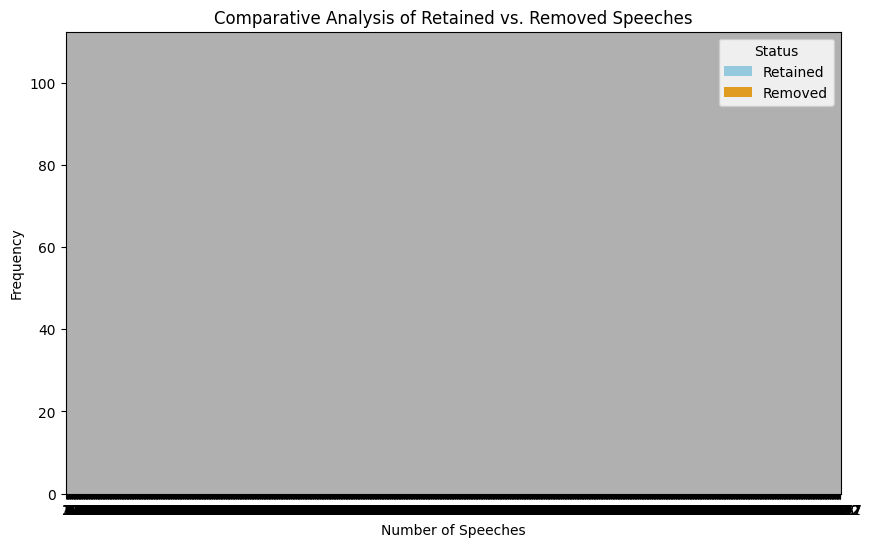

In [15]:

# Additional Analysis: Identify Speakers with Fewer Speeches
# Determine the speakers who have fewer than 24 speeches
speakers_few_speeches = speaker_characteristics[speaker_characteristics['num_speeches'] < 24]['speaker'].tolist()

# Filter the dataset to retain only speeches by speakers with 24 or more speeches
df_filtered = df[~df['speaker'].isin(speakers_few_speeches)]

# Print information about the number of retained speeches and removed speakers
print("\nInformation about Retained Speeches and Removed Speakers:")
print(f"Number of retained speeches: {len(df_filtered)}")
print(f"Number of removed speakers with fewer than 24 speeches: {len(speakers_few_speeches)}")

# Visualization: Comparative Analysis of Retained vs. Removed Speeches
plt.figure(figsize=(10, 6))
sns.countplot(x='num_speeches', data=speaker_characteristics, color='skyblue', label='Retained')
sns.countplot(x='num_speeches', data=speaker_characteristics[speaker_characteristics['speaker'].isin(speakers_few_speeches)], color='orange', label='Removed')
plt.title('Comparative Analysis of Retained vs. Removed Speeches')
plt.xlabel('Number of Speeches')
plt.ylabel('Frequency')
plt.legend(title='Status')
plt.grid(True)
plt.show()


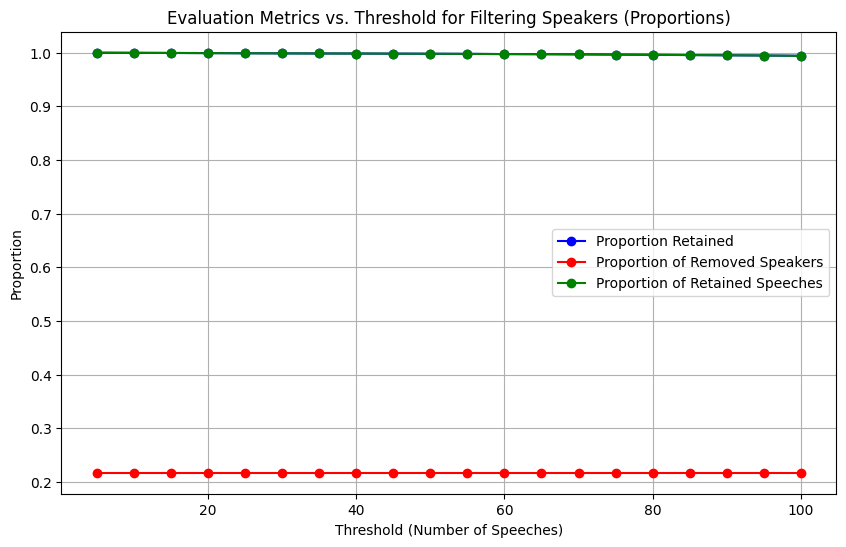

Best threshold for retaining speakers: 5


In [19]:

# Define a range of threshold values
threshold_values = range(5, 101, 5)  # Adjust the range as needed

# Initialize lists to store evaluation metrics
retained_proportions = []
num_removed_speakers_proportions = []
num_retained_speeches_proportions = []

# Total number of speeches
total_speeches = len(df)

# Iterate over threshold values
for threshold in threshold_values:
    # Identify speakers with fewer than threshold speeches
    speakers_few_speeches = df['speaker'].value_counts()[df['speaker'].value_counts() < threshold].index.tolist()
    
    # Filter the dataset to retain only speeches by speakers with at least threshold speeches
    df_filtered = df[~df['speaker'].isin(speakers_few_speeches)]
    
    # Calculate evaluation metrics as proportions
    num_retained_speeches = len(df_filtered)
    num_removed_speeches = total_speeches - num_retained_speeches
    retained_proportion = num_retained_speeches / total_speeches
    num_retained_speakers_proportion = 1-(len(speakers_few_speeches) / len(df['speaker'].unique()))
    num_retained_speeches_proportion = num_retained_speeches / total_speeches
    
    # Append proportions to lists
    retained_proportions.append(retained_proportion)
    num_removed_speakers_proportions.append(num_removed_speakers_proportion)
    num_retained_speeches_proportions.append(num_retained_speeches_proportion)

# Visualization: Evaluation Metrics vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(threshold_values, retained_proportions, marker='o', color='b', label='Proportion Retained')
plt.plot(threshold_values, num_removed_speakers_proportions, marker='o', color='r', label='Proportion of Removed Speakers')
plt.plot(threshold_values, num_retained_speeches_proportions, marker='o', color='g', label='Proportion of Retained Speeches')
plt.title('Evaluation Metrics vs. Threshold for Filtering Speakers (Proportions)')
plt.xlabel('Threshold (Number of Speeches)')
plt.ylabel('Proportion')
plt.legend()
plt.grid(True)
plt.show()

# Determine the best threshold based on your criteria (e.g., maximizing the proportion retained)
best_threshold = threshold_values[np.argmax(retained_proportions)]
print(f"Best threshold for retaining speakers: {best_threshold}")


In [17]:
retained_proportions

[0.9998609565473875,
 0.9996692606108812,
 0.9994468933245341,
 0.999137623880304,
 0.9988748726499995,
 0.9986565948769645,
 0.998457231102998,
 0.9983636834859829,
 0.998147450469604,
 0.9979516650197856,
 0.9977384991383906,
 0.9973331261313255,
 0.9971102476558142,
 0.9968336943180813,
 0.9963935604478631,
 0.995961605604269,
 0.9955046024916382,
 0.9951017854303932,
 0.9946815879375716,
 0.9940845189940002]